In [33]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def part(N, tmin, tmax):
    h = (tmax - tmin)/N
    
    t = np.zeros(N+1)
    for i in range(len(t)):
        t[i] = tmin + i*h
    
    return t, h

def solucao_edp_hiperbolica(a, bottom_function, left_function, right_function, initial_vel, n, m, xmin, xmax, tmin, tmax, name=None, sol_exata=None):
    def f_1(x):
        f_1 = eval(left_function)
        return f_1
    
    def f_2(x):
        f_2 = eval(right_function)
        return f_2
    
    def f_3(x):
        f_3 = eval(bottom_function)
        return f_3
    
    def g(x):
        g = eval(initial_vel)
        return g
    
    x,h = part(n+1, xmin, xmax)
    t,k = part(m+1, tmin, tmax) 
    
    sigma = a*k/h
    
    # SOLUÇÃO INICIAL
    SOLUTION = np.zeros((m+2,n+2))

    SOLUTION[0:,0] = np.flip(f_1(t))
    SOLUTION[0:,n+1] = np.flip(f_2(t))
    SOLUTION[m+1,0:] = f_3(x)
    
    # print(SOLUTION)
    
    for i in range(1,n+1):
        SOLUTION[m][i] = (1-sigma**2)*f_3(x[i]) + (0.5*sigma**2)*f_3(x[i+1]) + (0.5*sigma**2)*f_3(x[i-1]) + k*g(x[i]) 
    
    # i linha j coluna
    for i in reversed(range(m)): 
        for j in range(1, n+1): 
            SOLUTION[i][j] = 2*(1 - sigma**2)*SOLUTION[i+1][j] - SOLUTION[i+2][j] + (sigma**2)*(SOLUTION[i+1][j+1] + SOLUTION[i+1][j-1])
            # print(f"[{i}, {j}] ::: {SOLUTION[i,j]} = {SOLUTION[i+1][j]} + {sigma}*({SOLUTION[i+1][j-1]} - {2*SOLUTION[i+1][j]} + {SOLUTION[i+1][j+1]})")
            
    Xr, Tr = np.meshgrid(x,t)
    
    if sol_exata is not None:
        def u(x,t):
            u = eval(sol_exata)
            return u
                
        R = u(Xr, Tr)
        T = np.zeros(R.shape)

        for i in range(len(R)):
            T[i] = R[len(R) -1 - i]
        
        print("SOLUÇAO REAL ::: ")
        for i in range(len(T)):
            for j in range(len(T[0])):
                if T[i,j] < 0:
                    print(f"{T[i,j]:.5f} ", end=' ')
                else:
                    print(f" {T[i,j]:.5f} ", end=' ')
                
            print()
            
        e = abs(SOLUTION - T)
        print("ERRO ::: ")
        for i in range(len(T)):
            for j in range(len(T[0])):
                if e[i,j] < 0:
                    print(f"{e[i,j]:.5f} ", end=' ')
                else:
                    print(f" {e[i,j]:.5f} ", end=' ')
                
            print()
        
        # PLOTAGEM DOS PONTOS
    
    rows, cols = SOLUTION.shape
    x = np.linspace(xmin, xmax, cols)
    y = np.linspace(tmin, tmax, rows)
    X, Y = np.meshgrid(x, y)

    # Plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(X, Y, SOLUTION, cmap='Spectral')

    # Set the viewing angle (elevation, azimuth)
    ax.view_init(elev=30, azim=135)

    # Add labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    # Add a color bar which maps values to colors.
    # fig.colorbar(surf)

    if name is not None:
        plt.savefig(f"{name}.pdf", bbox_inches='tight')
    plt.show()
            
    return SOLUTION

SOLUÇAO REAL ::: 
 -0.00000  -0.70711  -1.00000  -0.70711  -0.00000  
 -0.00000  -0.50000  -0.70711  -0.50000  -0.00000  
 0.00000   0.00000   0.00000   0.00000   0.00000  
 0.00000   0.50000   0.70711   0.50000   0.00000  
 0.00000   0.70711   1.00000   0.70711   0.00000  
ERRO ::: 
 0.00000   0.00000   0.00000   0.00000   0.00000  
 0.00000   0.00000   0.00000   0.00000   0.00000  
 0.00000   0.00000   0.00000   0.00000   0.00000  
 0.00000   0.00000   0.00000   0.00000   0.00000  
 0.00000   0.00000   0.00000   0.00000   0.00000  


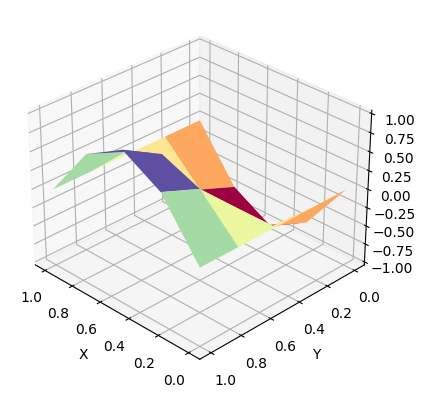

 0.00000  -0.70711  -1.00000  -0.70711   0.00000  
 0.00000  -0.50000  -0.70711  -0.50000   0.00000  
 0.00000   0.00000   0.00000   0.00000   0.00000  
 0.00000   0.50000   0.70711   0.50000   0.00000  
 0.00000   0.70711   1.00000   0.70711   0.00000  


In [35]:
SOL = solucao_edp_hiperbolica(1, "np.sin(np.pi*x)", "0", "0", "0", 3,3,0,1,0,1, name="12.3_1", sol_exata="np.cos(np.pi*t)*np.sin(np.pi*x)")
# SOL = solucao_edp_hiperbolica(1/(4*np.pi), "0", "0", "0", "np.sin(4*x*np.pi)", 3,3,0,0.5,0,0.5, name="12.3_2", sol_exata="np.sin(t)*np.sin(4*x*np.pi)")
SOL = solucao_edp_hiperbolica(1, "np.sin(x)", "0", "0", "0", 3,3,0,1,0,1, name="12.3_3", sol_exata="np.cos(np.pi*t)*np.sin(np.pi*x)")

for i in range(len(SOL)):
    for j in range(len(SOL[0])):
        if SOL[i,j] < 0:
            print(f"{SOL[i,j]:.5f} ", end=' ')
        else:
            print(f" {SOL[i,j]:.5f} ", end=' ')
        
    print()
    